### **Use Case: Personalized Workout Recommendation System Using Neural Networks**

**Objective:** Build a **Neural Network-based Recommendation System** for Freeletics to suggest personalized workout plans based on user preferences, fitness goals, and historical performance data. This use case aligns with the industry trend of using AI for hyper-personalization in fitness apps.

---

### **Problem Statement**
Freeletics aims to increase user engagement and satisfaction by offering personalized workout plans. Users input their fitness levels, goals (e.g., weight loss, strength building), and workout history. The system predicts the most suitable exercises or plans for individual users.

---

### **Dataset**
A hypothetical dataset with the following features:
1. **User Profile:**
   - Age, Gender, Fitness Level (Beginner/Intermediate/Advanced)
   - Workout Preferences (e.g., HIIT, Yoga, Strength Training)
2. **Historical Data:**
   - Completed Workouts, Average Duration, Calories Burned
3. **Fitness Goals:**
   - Weight Loss, Endurance, Muscle Gain
4. **Target:**
   - Recommended Workouts (e.g., "Full-Body HIIT", "Strength Training Plan A")

---

### **Approach**

1. **Data Preparation:** 
   - Collect user profiles, goals, and historical workout data.
   - Preprocess data to handle missing values, normalize numerical features, and encode categorical variables.

2. **Neural Network Model:**
   - **Input Layer:** User data and historical metrics.
   - **Hidden Layers:** Learn patterns and relationships between user attributes and workout types.
   - **Output Layer:** Predict workout recommendations.

3. **Evaluation:**
   - Metrics: Precision, Recall, and F1-Score for classification tasks.
   - Cross-validation to ensure model generalization.

4. **Deployment:**
   - Integrate the model with the Freeletics app to dynamically update recommendations.

---
### **Key Features**
1. **Input Features:**
   - Demographics (age, gender).
   - Historical performance metrics (e.g., calories burned).
   - Fitness preferences and goals.

2. **Output:**
   - Recommended workout plans (e.g., "HIIT Plan A", "Strength Plan B").

3. **Neural Network Architecture:**
   - Two hidden layers with ReLU activation.
   - Softmax activation in the output layer for multi-class classification.

---

### **Evaluation**
- Accuracy: Measures the modelâ€™s performance.
- Confusion Matrix: Shows prediction accuracy for each workout type.

---

### **Enhancements**
1. Use a larger dataset with real user data for better generalization.
2. Implement embeddings for categorical variables to capture relationships (e.g., user preferences and workout types).
3. Deploy the model as an API for integration with Freeletics' app.

---

In [0]:
%sh
pip install tensorflow

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 1.4822 - accuracy: 0.50001/1 [==============================] - 0s 445ms/step - loss: 1.4822 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 1.4677 - accuracy: 0.50001/1 [==============================] - 0s 3ms/step - loss: 1.4677 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 1.4534 - accuracy: 0.50001/1 [==============================] - 0s 2ms/step - loss: 1.4534 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 1.4391 - accuracy: 0.50001/1 [==============================] - 0s 3ms/step - loss: 1.4391 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 1.4248 - accuracy: 0.50001/1 [==============================] - 0s 2ms/step - loss: 1.4248 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 1.4107 - accuracy: 0.50001/1 [==============================] - 0s 3ms/step - loss: 1.4107 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - ETA: 0s - loss: 1.3965 - accuracy: 0.50001/1 [==============================] - 0s 3ms/step - loss: 1.3965 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 1.3825 - accuracy: 0.50001/1 [==============================] - 0s 2ms/step - loss: 1.3825 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 1.3685 - accuracy: 0.50001/1 [==============================] - 0s 2ms/step - loss: 1.3685 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 1.3545 - accuracy: 0.50001/1 [==============================] - 0s 2ms/step - loss: 1.3545 - accuracy: 0.5000
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 1.3420 - accuracy: 0.50001/1 [==============================] - 0s 3ms/step - loss: 1.3420 - accuracy: 0.5000

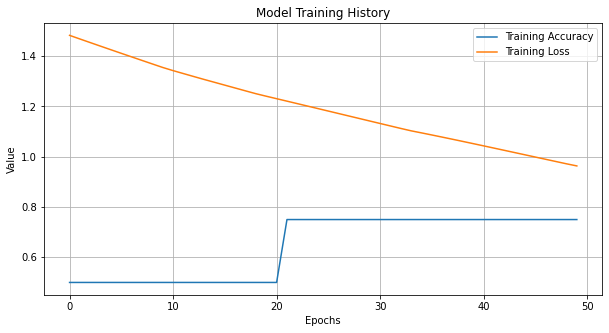

In [0]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Sample Dataset
data = {
    'Age': [25, 30, 22, 35, 40],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Fitness_Level': ['Beginner', 'Intermediate', 'Beginner', 'Advanced', 'Intermediate'],
    'Workout_Preference': ['HIIT', 'Yoga', 'HIIT', 'Strength', 'Cardio'],
    'Completed_Workouts': [10, 20, 15, 30, 25],
    'Average_Duration': [30, 45, 20, 60, 40],
    'Calories_Burned': [200, 350, 150, 500, 300],
    'Goal': ['Weight Loss', 'Endurance', 'Weight Loss', 'Muscle Gain', 'Endurance'],
    'Recommended_Workout': ['HIIT Plan A', 'Yoga Flow', 'HIIT Plan B', 'Strength Plan A', 'Cardio Circuit']
}

df = pd.DataFrame(data)

# Data Preprocessing
label_encoders = {}
for col in ['Gender', 'Fitness_Level', 'Workout_Preference', 'Goal', 'Recommended_Workout']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('Recommended_Workout', axis=1)
y = df['Recommended_Workout']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer for classification
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predict Recommendations
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)

# Get the class names for the confusion matrix labels
class_names = label_encoders['Recommended_Workout'].inverse_transform(np.arange(len(label_encoders['Recommended_Workout'].classes_)))

# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
#disp.plot(cmap=plt.cm.Blues)
#plt.title("Confusion Matrix")
#plt.show()

# Visualize Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Model Training History")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
